# Рекомендация тарифов
Некоторый оператор мобильной связи выяснил, что многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 
Известно:
 - сalls — количество звонков,
 - minutes — суммарная длительность звонков в минутах,
 - messages — количество sms-сообщений,
 - mb_used — израсходованный интернет-трафик в Мб,
 - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Этапы исследования

[Шаг 1. Откроем файл с данными и изучим общую информацию](#1)

[Шаг 2. Разделим исходные данные на обучающую, валидационную и тестовую выборки](#2)

[Шаг 3. Исследуем качество разных моделей](#3)

[Шаг 4. Проверим качество модели на тестовой выборке](#4)

[Шаг 5. Вывод](#6)

<a id='1'></a>

## 1. Откроем и изучим файл

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\bosss\Desktop\Датасеты Практикум\05.csv')
display(df.info())
display(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


В целом, ничего нового не увидели, все те же цифры:)

<a id='2'></a>

## 2. Разобьем данные на выборки

In [2]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df, test_size = 0.2, random_state = 12345)
df_train, df_test = train_test_split(df_train, test_size = 0.25, random_state = 12345)

display(df_train.shape)
display(df_valid.shape)
df_test.shape

(1928, 5)

(643, 5)

(643, 5)

Разбили изначальный датасет на 3 выборки: обучающую, валидационную и тестовую.
Разбили в 2 этапа:
1. Первоначально разделили исходные данные на обучающую и валидационную выборки в соотношении 4:1.
2. Вторым этапом разделили обучающую выборку на новую обучающую и тестовую выборки в соотношении 3:1.

Как итог, получили 3 датасета в соотношении 3:1:1 (60%-20%-20%)

<a id='3'></a>

## 3. Исследуем модели

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Выделим целевой признак и остальные для всех выборок

In [4]:
features_train = df_train.drop(['is_ultra'], axis = 1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis = 1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis = 1)
target_test = df_test['is_ultra']

Напишем функцию для обучения моделей

In [5]:
def obuchenie(model):
    model.fit(features_train, target_train)
    model.predict(features_valid)
    result_model = model.score(features_valid, target_valid)
    return result_model

**Обучим модель "дерево решений"**

In [6]:
from sklearn.metrics import accuracy_score

best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 26):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    obuchenie(model_1)
    if obuchenie(model_1) > best_result:
        best_model = model_1
        best_result = obuchenie(model_1)
        best_depth = depth
        
print('Правильность наилучшей модели:', best_result)
print('Глубина дерева:', best_depth)

Правильность наилучшей модели: 0.7884914463452566
Глубина дерева: 5


**Обучим модель "случайного леса"**

In [7]:
best_model = None
best_result = 0
best_depth = 0
best_est = 0

for est in range(10, 100, 10):
    for depth in range(1, 26):
        model_2 = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth=depth)
        obuchenie(model_2)
        if obuchenie(model_2) > best_result:
            best_model = model_2
            best_result = obuchenie(model_2)
            best_depth = depth
            best_est = est
            
print('Правильность наилучшей модели:', best_result)
print('Количество деревьев:', best_est)
print('Глубина дерева:', best_depth)

Правильность наилучшей модели: 0.8009331259720062
Количество деревьев: 20
Глубина дерева: 6


**Обучим модель "логистической регрессии"**

In [8]:
model_3 = LogisticRegression(random_state = 12345)
obuchenie(model_3)

print('Правильность модели:', obuchenie(model_3))

Правильность модели: 0.702954898911353


C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Как итог**, получаем самую высокую правильность работы у модели "случайного леса" с параметрами глубины = 6, количества деревьев = 20. Однако время работы модели оставляет желать лучшего.

Хуже всего работает модель логистической регрессии, а вот модель дерева решений немногим хуже случайного леса с оптимальным параметром глубины = 5. Время поиска лучших гиперпараметров не разнится вовсе. Поэтому сравнивая модели по соотношению скорость / качество - наилучшей оказалась модель дерева решений. 

<a id='4'></a>

## 4. Проверим модель на тестовой выборке

In [9]:
model_1.predict(features_test)
result1 = model_1.score(features_test, target_test)
print('Результат проверки `дерева решений` на тестовой выборке = ', result1)

model_2.predict(features_test)
result2 = model_2.score(features_test, target_test)
print('Результат проверки `случайного леса` на тестовой выборке = ', result2)

model_3.predict(features_test)
result3 = model_3.score(features_test, target_test)
print('Результат проверки `логистической регрессии` на тестовой выборке = ', result3)

Результат проверки `дерева решений` на тестовой выборке =  0.7293934681181959
Результат проверки `случайного леса` на тестовой выборке =  0.7931570762052877
Результат проверки `логистической регрессии` на тестовой выборке =  0.6967340590979783


**Видим по результатам проверки**, что максимально приближенные значения к `accuracy` на валидационной выборке получились у 2ух моделей: случайный лес и логистическая регрессия. В то время, как дерево решений значительно подкачало (правильные ответы разнятся на 5%).

Однако выбирая из 2ух вышеназванных, взгляд падает на модель случайного леса, поскольку значение правильности порядком выше.

,calls,minutes,messages,mb_used
calls,1.000000,0.982083,0.177385,0.286442
minutes,0.982083,1.000000,0.173110,0.280967
messages,0.177385,0.173110,1.000000,0.195721
mb_used,0.286442,0.280967,0.195721,1.000000


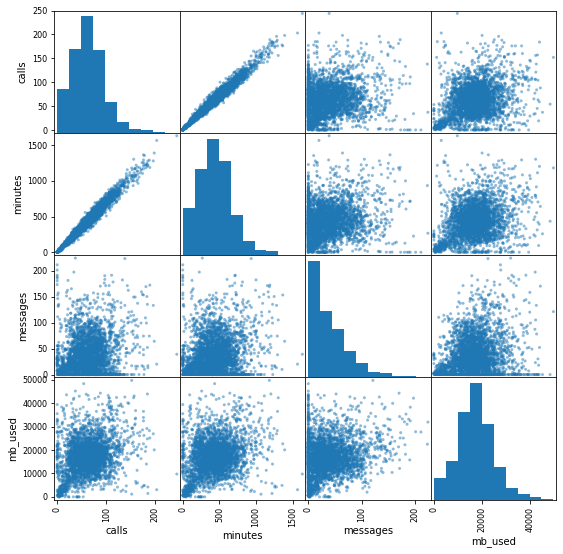

In [10]:
# Выберем числовые факторы из начальных данных и сформируем из них датасет
features = df.drop(['is_ultra'], axis = 1)
# Найдем коэффициент корреляции для всех пар столбцов
display(features.corr())
# Построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(features, figsize = (9,9))
pass

<a id='5'></a>

<a id='6'></a>

## 5. Вывод

По итогам нашего исследования, можно было бы выбрать самую оптимальную (по скорости / качеству) модель дерева решений, однако этого сделать нельзя в виду плохих результатов на тестовой выборке - модель недообучилась.\
Логистическую регрессию рассматривать смысла никакого нет - сравнительно низкое качество работы модели.\
Остается последняя - самая надежная модель случайного леса (все результаты выше заданного порога и приближены к 80%). Но вот не задача, уж больно долго "соображает". 

Поэтому, осознавая все вышеперечисленные преимущества и недостатки, нужно смотреть на пожелания заказчика: быстрее или качественней.